In [1]:
import os
import random
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
%matplotlib inline

Let's configure all random numbers generators to support determinism and obtain reproducible results.

In [2]:
# settings for reproducibility
seed = 42
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Load Data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Checkout the data

The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image.

In [4]:
from tensorflow.keras.utils import to_categorical

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

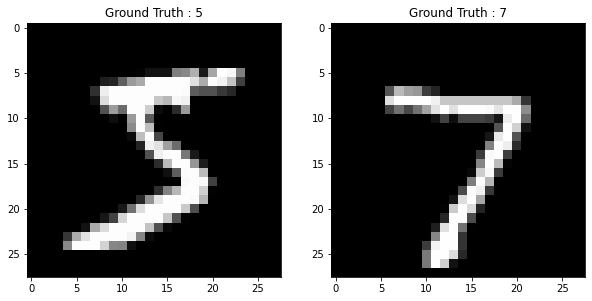

In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


# Process the data

* The images are grayscale and the pixel values range from 0 to 255.
* Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.
* We convert the data to float and **scale** the values between 0 to 1.
* We also convert the labels from integer to **categorical ( one-hot ) encoding** since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the number. For example, using a one-hot encoding of 10 classes, the integer 5 will be encoded as 0000010000

In [6]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dim_data = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dim_data)
test_data = test_images.reshape(test_images.shape[0], dim_data)

In [7]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [8]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [9]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [10]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Create the network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

# Configure the Network

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Network

In [14]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2700 - accuracy: 0.9166 - val_loss: 0.1934 - val_accuracy: 0.9364
Epoch 2/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0932 - accuracy: 0.9710 - val_loss: 0.0896 - val_accuracy: 0.9732
Epoch 3/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0871 - val_accuracy: 0.9731
Epoch 4/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0729 - val_accuracy: 0.9800
Epoch 5/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0288 - accuracy: 0.9907 - val_loss: 0.0805 - val_accuracy: 0.9801
Epoch 6/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0915 - val_accuracy: 0.9764
Epoch 7/20
60000/60000 [==============================] 

# Plot the loss and accuracy curves

Text(0.5, 1.0, 'Loss Curves')

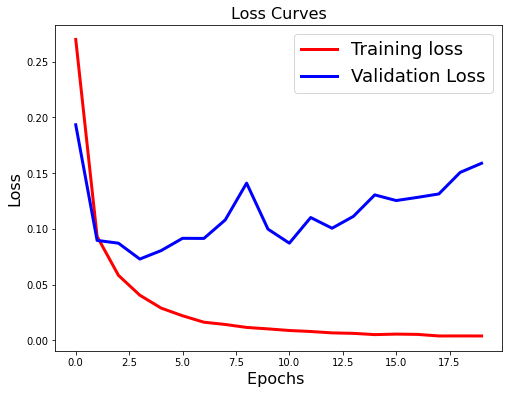

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

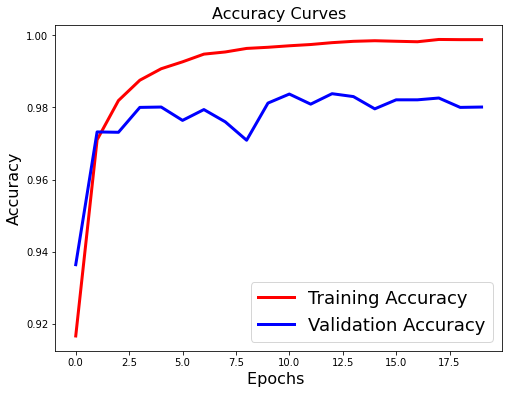

In [16]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Evaluate the trained network on test data

In [17]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.1589 - accuracy: 0.9801


In [18]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.15887983631565528, accuracy = 0.9800999760627747


# Create a new network with Dropout Regularization

In [19]:
from tensorflow.keras.layers import Dropout
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dim_data,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(classes_num, activation='softmax'))

In [20]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3770 - accuracy: 0.8833 - val_loss: 0.1518 - val_accuracy: 0.9533
Epoch 2/20
60000/60000 [==============================] - 1s 13us/sample - loss: 0.1702 - accuracy: 0.9491 - val_loss: 0.1094 - val_accuracy: 0.9650
Epoch 3/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1298 - accuracy: 0.9617 - val_loss: 0.1003 - val_accuracy: 0.9717
Epoch 4/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.1114 - accuracy: 0.9665 - val_loss: 0.0783 - val_accuracy: 0.9765
Epoch 5/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0981 - accuracy: 0.9709 - val_loss: 0.0821 - val_accuracy: 0.9778
Epoch 6/20
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0868 - accuracy: 0.9744 - val_loss: 0.0819 - val_accuracy: 0.9773
Epoch 7/20
60000/60000 [==============================] 

Text(0.5, 1.0, 'Loss Curves')

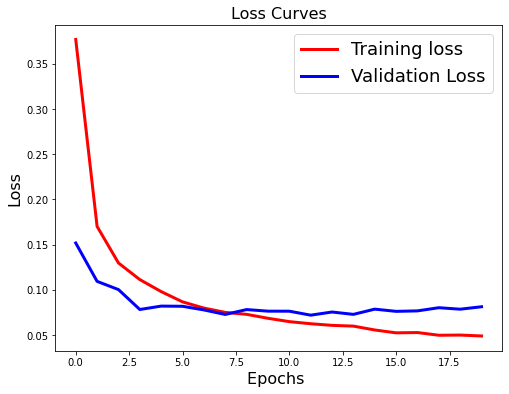

In [22]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

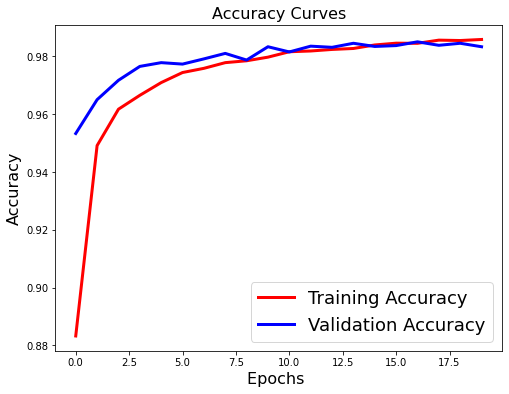

In [23]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['accuracy'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [24]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.0814 - accuracy: 0.9833


In [25]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.08135654206477057, accuracy = 0.983299970626831


# Predict the first image from test data

We have seen that the first image is the number 7. Let us predict using the model

In [26]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[1.29905996e-18, 1.10607663e-14, 1.40711756e-11, 1.03725896e-10,
        7.29663463e-19, 1.92765065e-14, 4.65404149e-28, 1.00000000e+00,
        6.88956165e-16, 3.75895357e-11]], dtype=float32)

Model prediction: 2


Text(0.5, 1.0, 'Ground Truth : 2')

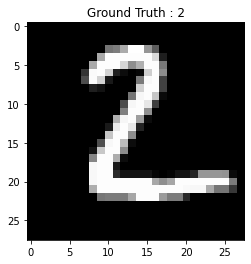

In [27]:
# Predict the most likely class
print("Model prediction: {}".format(model_reg.predict_classes(test_data[[1],:])[0]))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))